## Name: Daniel Kojo Afealete Fiadjoe

## Student ID: 202291439¶

## Course: DSCI-6601-001 (Pract Machine Learning 77223)

## Assignment 3

### Import Libraries¶

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

# Libraries to split data, create simple linaer regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Code to load in the breast cancer data set and show the rows and columns
data = pd.read_csv('breast-cancer-data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Code to display the number of rows and columns
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 569 rows and 32 columns.


In [5]:
# Display columns data type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are 31 numerical varibales and 1 categorical variable.

In [6]:
data.isna().sum() 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is no missing data in the data set provided.

In [7]:
# Checking the variables is uniqueness.
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

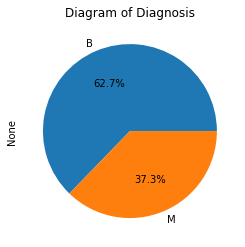

In [8]:
# Pie chart to represent target data
data.groupby('diagnosis').size().plot(kind='pie', autopct='%1.1f%%')
plt.title('Diagram of Diagnosis')
plt.show()

In [9]:
# The categorical variable type of target variable needs to be change the numerical before being used for modelling.
data['diagnosis'].replace({'M':1, 'B':0}, inplace=True)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


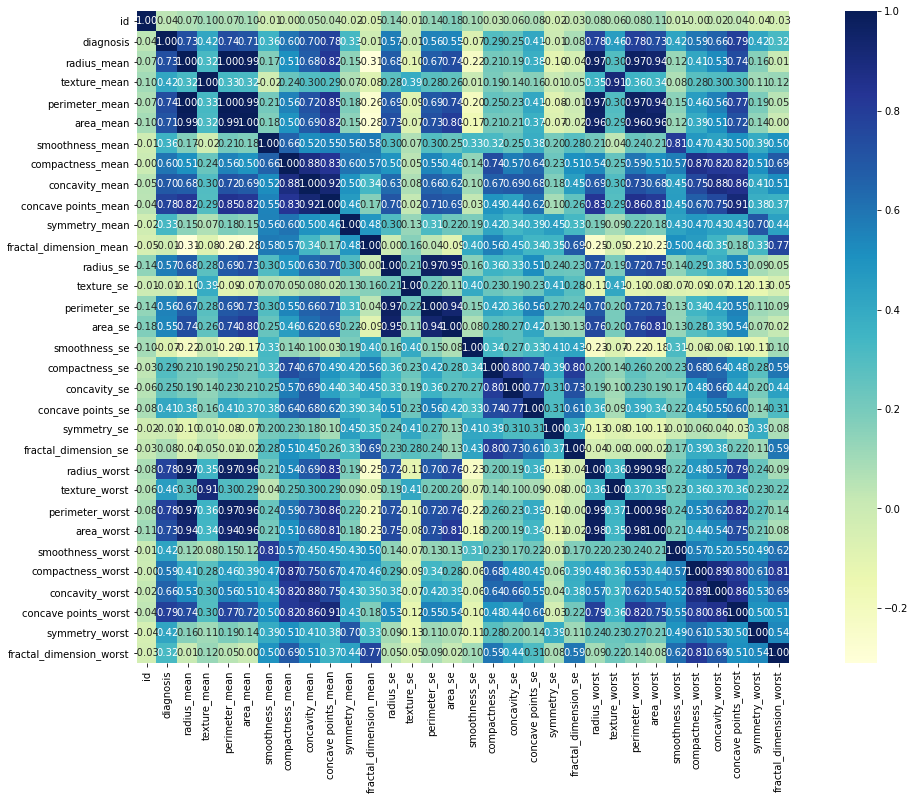

In [11]:
#Let's Look at correlation values
corr=data.corr()
fig,ax=plt.subplots(figsize=(20,12))
ax=sns.heatmap(corr,annot=True,square=True,fmt=".2f",cmap="YlGnBu")
plt.show()

In [12]:
# Divide the data into independent and dependent variables
X = data.drop(["diagnosis"], axis=1)             # independent variables
Y = data[["diagnosis"]]  

In [13]:
# Print new data
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [15]:
# Spliting data into training (90%) and test data (10%) sets.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [16]:
# Shape of the train and test sets
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])
print("Number of rows in train data =", y_train.shape[0])
print("Number of rows in test data =", y_test.shape[0])

Number of rows in train data = 512
Number of rows in test data = 57
Number of rows in train data = 512
Number of rows in test data = 57


In [17]:
log_model = LogisticRegression(random_state=1)
clf = log_model.fit(x_train,y_train)
clf.score(x_train,y_train)

0.630859375

In [18]:
# Printing errors
y_predict = log_model.predict(x_test)
print ('Mean Absolute error:', metrics.mean_absolute_error(y_test, y_predict))
print ('Mean squared error:', metrics.mean_squared_error(y_test, y_predict, squared=True))
print ('Root Mean squared error:', metrics.mean_squared_error(y_test, y_predict, squared=False))

Mean Absolute error: 0.40350877192982454
Mean squared error: 0.40350877192982454
Root Mean squared error: 0.6352234031660235


In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        34
           1       0.00      0.00      0.00        23

    accuracy                           0.60        57
   macro avg       0.30      0.50      0.37        57
weighted avg       0.36      0.60      0.45        57



## Using KNN Classifier to model

You are using the k-NN classifier model to predict diagnosis from the radius_mean, texture_mean, perimeter_mean and area_mean columns of the breast-cancer-data data set. You have performed a grid search experiment to determine which value of k optimizes the k-NN classifier.

In [20]:
# Duplicating data to be used.
data2 = data

In [21]:
# Drop columns not needed in the data.
data2.drop(data2.iloc[:, 6:32], inplace=True, axis=1)
data2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,842302,1,17.99,10.38,122.80,1001.0
1,842517,1,20.57,17.77,132.90,1326.0
2,84300903,1,19.69,21.25,130.00,1203.0
3,84348301,1,11.42,20.38,77.58,386.1
4,84358402,1,20.29,14.34,135.10,1297.0
...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0
565,926682,1,20.13,28.25,131.20,1261.0
566,926954,1,16.60,28.08,108.30,858.1
567,927241,1,20.60,29.33,140.10,1265.0


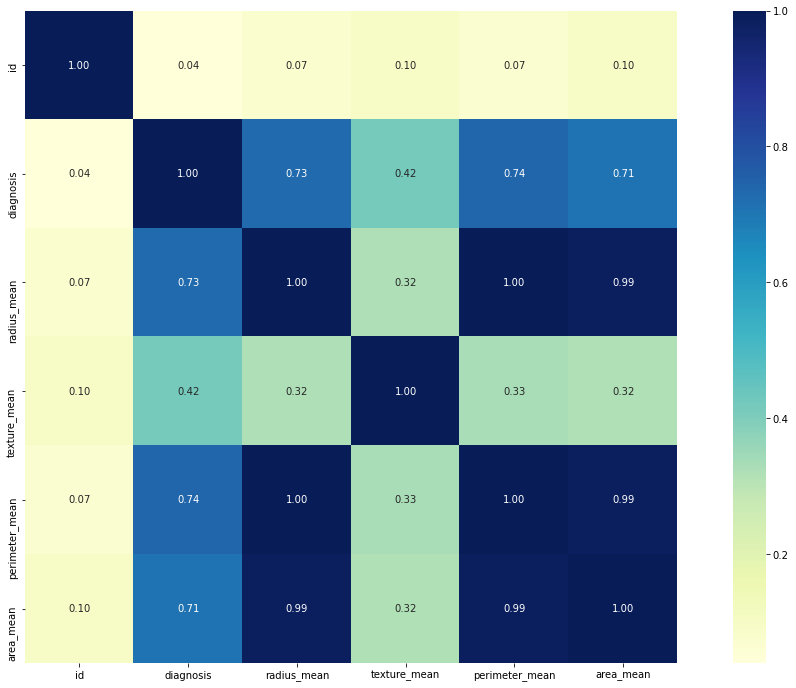

In [22]:
#Let's Look at correlation values
corr=data2.corr()
fig,ax=plt.subplots(figsize=(20,12))
ax=sns.heatmap(corr,annot=True,square=True,fmt=".2f",cmap="YlGnBu")
plt.show()

Observation:
- The correlation between the variables are radius_mean, texture_mean, perimeter_mean and area_mean and should be used in the model.
- The variable "id" will be dropped because the correlation is not good.

In [23]:
# Divide the data into independent and dependent variables. 
# 
X2 = data2.drop(["diagnosis", "id"],  axis=1)               # independent variables
Y2 = data2[["diagnosis"]]  

In [24]:
# Print new data
X2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0


In [25]:
X2.shape

(569, 4)

In [26]:
# Print new data
Y2.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [27]:
from sklearn.model_selection import GridSearchCV

x2_train,x2_test, y2_train, y2_test = train_test_split(X2,Y2,test_size= 0.1,random_state= 0)
knn = KNeighborsClassifier()
k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1, return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search = grid.fit(x2_train, y2_train)

print("K value is :", grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s


K value is : {'n_neighbors': 29}
Accuracy for our training dataset with tuning is : 89.43%


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.8s finished


Text(0, 0.5, 'Test scores')

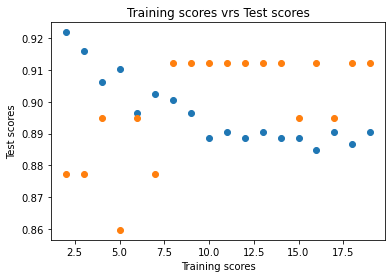

In [28]:
# Plotting training scores and test scores form the data.
Training_score = []
Test_score = []
K = []
x2_train,x2_test, y2_train, y2_test = train_test_split(X2,Y2,test_size= 0.1,random_state= 1)

for k in range (2,20):
    clf =KNeighborsClassifier(n_neighbors= k )
    clf.fit(x2_train, y2_train)
    Training_score.append(clf.score(x2_train, y2_train))
    Test_score.append(clf.score(x2_test,y2_test))
    K.append(k)
plt.scatter(K, Training_score)
plt.scatter(K, Test_score)
plt.title('Training scores vrs Test scores')
plt.xlabel('Training scores')
plt.ylabel('Test scores')


## Paper (On Over-fitting in Model Selection and Subsequent Selection Bias in Performance Evaluation) review and implementation of recommendations.

#### What is the issue in this paper in model selection that is addressed. How does that apply specifically to our scenario?

This journal written by Cawlery and Talbot was to address over-fitting in model selection and subsequent selection bias in performance evaluation. The paper discussed the imprtance of bias and variance in model selection and performance evaluation. It demonstrated that a high variance can lead to over-fitting in model selection,
and hence poor performance, even when the number of hyper-parameters is relatively small.

- The issue the paper addressed was bias and variance in model selection and performance evaluation. This situation if not addressed leads to over-fitting in model selection and hence poor performance of the models. This issue was addressed by looking at model evaluation as integral part of model fitting procedure and recommended that it should be conducted independently in each trial in order to prevent selection bias. The principles used requires repeated training of models using different sets of hyperparameers values.

- In our scenario in order to avoid bais and overfitting in our model, I implememted a nested cross validation using GridSearchCV and cross_val_score techniques. The nested cross validation effectively uses a series of train/validation/test set splits. The implementation below build a model with optimized hyperparameters by grid search and cross_val_score.

#### Based on your understanding of this issue and recommendations of the paper, write code to implement a solution tothe problem that likely affects our given scenario, according to the paper’s main thesis. In your code, compare the new training solution to the old one in terms by testing using the left-out validation set above.

In [29]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [30]:
# Duplicating data to be used.
data3 = data

In [31]:
# Drop columns not needed in the data.
data3.drop(data3.iloc[:, 6:32], inplace=True, axis=1)
data3

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,842302,1,17.99,10.38,122.80,1001.0
1,842517,1,20.57,17.77,132.90,1326.0
2,84300903,1,19.69,21.25,130.00,1203.0
3,84348301,1,11.42,20.38,77.58,386.1
4,84358402,1,20.29,14.34,135.10,1297.0
...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0
565,926682,1,20.13,28.25,131.20,1261.0
566,926954,1,16.60,28.08,108.30,858.1
567,927241,1,20.60,29.33,140.10,1265.0


In [32]:
# Divide the data into independent and dependent variables. 
X3 = data3.drop(["diagnosis", "id"],  axis=1)               # independent variables
Y3 = data3[["diagnosis"]]                                   # dependent variable

The list of scores are:  [0.88921993 0.88754555 0.88933074 0.88757018 0.88931843 0.89095588
 0.89102974 0.87518467 0.8822023  0.87344873 0.88580961 0.86636955
 0.88758249 0.87874274 0.87869349 0.88226386 0.88228849 0.88741013
 0.88403674 0.87354723 0.88921993 0.88750862 0.88223924 0.89276569
 0.87344873 0.89281493 0.89448931 0.88047868 0.89464936 0.87869349]


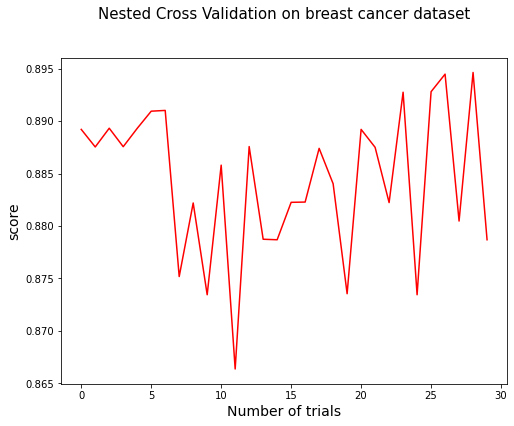


Mean scores : 0.8842952821826062


In [33]:
# Codes to implement non-nested and nested cross-validation strategies on a classifier.
# Number of random trials
no_trials = 30

# Set up possible values of parameters to optimize over
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
k_range1 = list(range(1,31))
p_grid = dict(n_neighbors=k_range1)

# Arrays to store scores
nested_scores = np.zeros(no_trials)

# Loop for each trial
for i in range(no_trials):

    # Choose cross-validation techniques for the inner and outer loops, independently of the dataset.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=knn1, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X3, y=Y3, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

print("The list of scores are: ", nested_scores)

# Plot scores on each trial for nested CV
plt.figure(figsize=(8, 6))
(nested_line,) = plt.plot(nested_scores, color="r")
plt.ylabel("score", fontsize="14")
plt.xlabel("Number of trials", fontsize="14")
plt.title("Nested Cross Validation on breast cancer dataset",
    x=0.5,
    y=1.1,
    fontsize="15",)
plt.show()
print()
print("Mean scores :", nested_scores.mean())